In [1]:
# Import Librariesfrom keras.models import Sequential
from keras.layers import Dense
import re
import warnings
from keras.models import load_model
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras import initializers
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape[0]

60000

In [4]:
x_train=x_train.reshape(x_train.shape[0],28*28)
x_test=x_test.reshape(x_test.shape[0],28*28)  

In [5]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [6]:
x_train.shape

(60000, 784)

In [7]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_train= np_utils.to_categorical(y_train)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_test)
y_test = encoder.transform(y_test)
y_test= np_utils.to_categorical(y_test)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(Dropout(0.8))
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# model.add(Activation('softmax'))
for layer in model.layers:
    
    print(layer.output_shape)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(None, 64)
(None, 64)
(None, 256)
(None, 256)
(None, 128)
(None, 128)
(None, 10)


In [9]:
history=model.fit(x_train,y_train, batch_size=32, epochs=20, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
42000/42000 [==============================] - 11s 272us/sample - loss: 1.3292 - acc: 0.5288 - val_loss: 0.5039 - val_acc: 0.8700
Epoch 2/20
42000/42000 [==============================] - 8s 184us/sample - loss: 0.8967 - acc: 0.6995 - val_loss: 0.4307 - val_acc: 0.8901
Epoch 3/20
42000/42000 [==============================] - 7s 164us/sample - loss: 0.8190 - acc: 0.7285 - val_loss: 0.4186 - val_acc: 0.8907
Epoch 4/20
42000/42000 [==============================] - 6s 136us/sample - loss: 0.7695 - acc: 0.7495 - val_loss: 0.3851 - val_acc: 0.8979
Epoch 5/20
42000/42000 [==============================] - 5s 126us/sample - loss: 0.7385 - acc: 0.7641 - val_loss: 0.4227 - val_acc: 0.8802
Epoch 6/20
42000/42000 [==============================] - 7s 167us/sample - loss: 0.7252 - acc: 0.7715 - val_loss: 0.3986 - val_acc: 0.8929
Epoch 7/20
42000/42000 [==============================] - 8s 

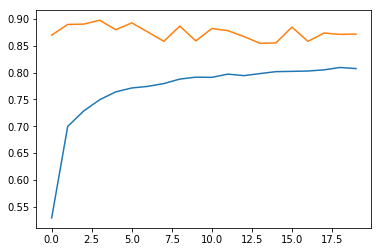

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])


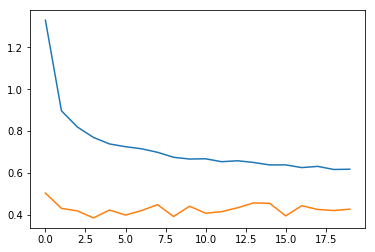

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [14]:
li=[]
import cv2
for i in range(0,10,1):
    img1=cv2.imread(f'data/{i}.png',0);
    img1=~img1
    img1=img1.reshape(1,28*28)
    Y_pred=model.predict(img1)
    Y_pred=np.argmax(Y_pred)
    li.append(Y_pred)

In [15]:
li

[5, 9, 2, 3, 8, 5, 6, 3, 8, 8]